# 데이터 톺아보기
---
👩‍💻 **Author** Suhee.Jeong(suheeeee1120@gmail.com)<br>
👩‍💻 **Edit Date** 2021.08.22

#### Environment setting

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

import seaborn as sns
sns.set_context('notebook')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data_dir_path = "../data"
train_path = f'{data_dir_path}/train.csv'
test_path = f'{data_dir_path}/test.csv'
submisstion_path = f'{data_dir_path}/submission.csv'

## 데이터 살펴보기

### 데이터 불러오기

In [3]:
df = pd.read_csv(train_path, parse_dates=['일자'])
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
df_test = pd.read_csv(test_path, parse_dates=['일자'])
df_test.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


### 기본 정보 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


📌 바로 확인되는 결측치(NaN) 없음

In [6]:
df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


**📌 확인되는 정보**
- 본사정원수 : 유동적, 2645~3305
- 본사휴가자수 : 평균을 기준으로 하였을 때 약 5% 인원은 휴가자이다.
- 본사출장자수 : 평균을 기준으로 하였을 때, 약 1.5%의 인원은 출장자이다.
- 현본사소속재택근무자수 : 평균을 기준으로 하였을 때, 약 1.5%의 인원은 재택근무자이다.
- 본사시간외근무명령서승인건수 : 평균을 기준으로 하였을 때, 약 9.8%의 인원은 야근을 한다. 
- 중식계 : 평균을 기준으로 하였을 때, 총 출근자(2366=2807-157-241-43) 중 37.6%만이 점심에 구내식당을 이용하였다.
- 석식계 : 평균을 기준으로 하였을 때, 총 출근자 중 19.5%는 저녁에 구내식당을 이용하였다. 야근을 하는 인원보다 석식을 이용하는 평균인원이 더 많다!

**💬 아이디어**
- 보다 정확한 식당 이용률을 산정하기 위해서는 날짜별로 이용률을 계산할 필요가 있다.
    - std가 큰 편이라고 생각되는데 정확히는 정규화를 해서 확인해 봐야겠다.
- 출근자 = 본사정원수 - (휴가자 + 출장자 + 재택근무자)
- 저녁을 먹고 퇴근하는 것일까? 야근 신청을 안하고 야근을 하는 것일까?
- 재택근무로 야근을하는 사람들도 **본사시간외근무명령서승인건수**에 포함될까?

In [7]:
df.describe(include=['O'])

,요일,조식메뉴,중식메뉴,석식메뉴
count,1205,1205,1205,1205
unique,5,1204,1198,1168
top,목,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 무채국 김...,콩나물밥*양념장 (쌀:국내산) 팽이장국 치킨핑거*요거트드레싱 꽃맛살샐러드 얼갈...,*
freq,244,2,2,19


**📌 확인되는 정보**
- 요일 : 구내식당은 일주일 중 5일만 열린다. 데이터의 기간내에 목요일이 가장 많고 총 244번 반복된다.
- 조식메뉴 : 같은 메뉴가 등장한 날을 단 2번이다.
- 중식메뉴 : 같은 메뉴가 등장한 날을 단 2번이다.
- 석식메뉴 : 메뉴가 '\*'인 것이 등장한다. 이는 석식이 없는날인 듯하다. 

**💬 아이디어**
- 메뉴 분석을 위해서는 메뉴에 대하여 데이터 전처리가 필요하다.
    - 메뉴의 최대 갯수를 구하여 조식_1, 조식_2, ... 이런식으로 분해하면 어떨까?
- 요일과 구내식당 이용률의 관계가 있을까?
    - 월요일 점심 이용률은 다른날에 비해 낮다거나 
    - 금요일 석식 이용률은 다른날에 비해 낮다거나
- 조식계는 없는 조식메뉴는 있다. 아침메뉴는 복지인가...? 가고싶다..토지주택공사..

### 근무인원과 날짜 그리고 구내식당
복잡한 메뉴 전처리에 앞서 수치/날짜 데이터 간의 관계를 확인해 보자.

#### 분석용 데이터 생성

In [8]:
# 메뉴 정보 drop
df_nums = df.drop(['조식메뉴', '중식메뉴', '석식메뉴'], axis=1)
df_nums.head(5)
df_nums.info()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식계             1205 non-null   float64       
 8   석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 84.9+ KB


In [9]:
df_nums['현본사소속재택근무자수'] = df_nums['현본사소속재택근무자수'].astype('int')
df_nums['중식계'] = df_nums['중식계'].astype('int')
df_nums['석식계'] = df_nums['석식계'].astype('int')
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   int32         
 7   중식계             1205 non-null   int32         
 8   석식계             1205 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(4), object(1)
memory usage: 70.7+ KB


#### feature 조정
- 출근자수 추가
- feature name를 적절히 변경
    - 일자 : date
    - 요일 : day
    - 본사정원수 : n_total
    - 본사휴가자수 : n_rest,
    - 본사출장자수 : n_trip,
    - 본사시간외근무명령서승인건수 : n_night_shift
    - 현본사소속재택근무자수 : n_home
    - 중식계 : n_lunch
    - 석식계 : n_dinner
    - 출근자수 : n_workers
- 요일을 categorical로 변경

In [10]:
# 출근자수 추가
df_nums['출근자수'] = df_nums['본사정원수'] - (df_nums['본사휴가자수'] + 
                                               df_nums['본사출장자수'] +
                                               df_nums['현본사소속재택근무자수'])
df_nums.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,출근자수
0,2016-02-01,월,2601,50,150,238,0,1039,331,2401
1,2016-02-02,화,2601,50,173,319,0,867,560,2378
2,2016-02-03,수,2601,56,180,111,0,1017,573,2365
3,2016-02-04,목,2601,104,220,355,0,978,525,2277
4,2016-02-05,금,2601,278,181,34,0,925,330,2142


In [11]:
# feature name를 적절히 변경
df_nums.columns = ['date', 'day', 'n_total', 'n_rest', 'n_trip', 'n_night_shift',
                   'n_home', 'n_lunch', 'n_dinner', 'n_workers']
df_nums.head(5)

,date,day,n_total,n_rest,n_trip,n_night_shift,n_home,n_lunch,n_dinner,n_workers
0,2016-02-01,월,2601,50,150,238,0,1039,331,2401
1,2016-02-02,화,2601,50,173,319,0,867,560,2378
2,2016-02-03,수,2601,56,180,111,0,1017,573,2365
3,2016-02-04,목,2601,104,220,355,0,978,525,2277
4,2016-02-05,금,2601,278,181,34,0,925,330,2142


In [36]:
# 요일을 categorical로 변경
day_category = pd.Categorical(df_nums.day, 
                              categories=['월', '화', '수', '목', '금'],
                              ordered=True)
day_category

df_nums.day = day_category
df_nums.head(5)
df_nums.info()

['월', '화', '수', '목', '금', ..., '수', '목', '금', '월', '화']
Length: 1205
Categories (5, object): ['월' < '화' < '수' < '목' < '금']

,date,day,n_total,n_rest,n_trip,n_night_shift,n_home,n_lunch,n_dinner,n_workers
0,2016-02-01,월,2601,50,150,238,0,1039,331,2401
1,2016-02-02,화,2601,50,173,319,0,867,560,2378
2,2016-02-03,수,2601,56,180,111,0,1017,573,2365
3,2016-02-04,목,2601,104,220,355,0,978,525,2277
4,2016-02-05,금,2601,278,181,34,0,925,330,2142


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1205 non-null   datetime64[ns]
 1   day            1205 non-null   category      
 2   n_total        1205 non-null   int64         
 3   n_rest         1205 non-null   int64         
 4   n_trip         1205 non-null   int64         
 5   n_night_shift  1205 non-null   int64         
 6   n_home         1205 non-null   int32         
 7   n_lunch        1205 non-null   int32         
 8   n_dinner       1205 non-null   int32         
 9   n_workers      1205 non-null   int64         
dtypes: category(1), datetime64[ns](1), int32(3), int64(5)
memory usage: 72.1 KB


#### 일변수분석

In [29]:
df_nums.describe()

,n_total,n_rest,n_trip,n_night_shift,n_home,n_lunch,n_dinner,n_workers
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614,2365.253112
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202,176.563062
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,1372.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000,2281.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000,2357.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000,2461.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,2921.000000


- 데이터 분포 확인

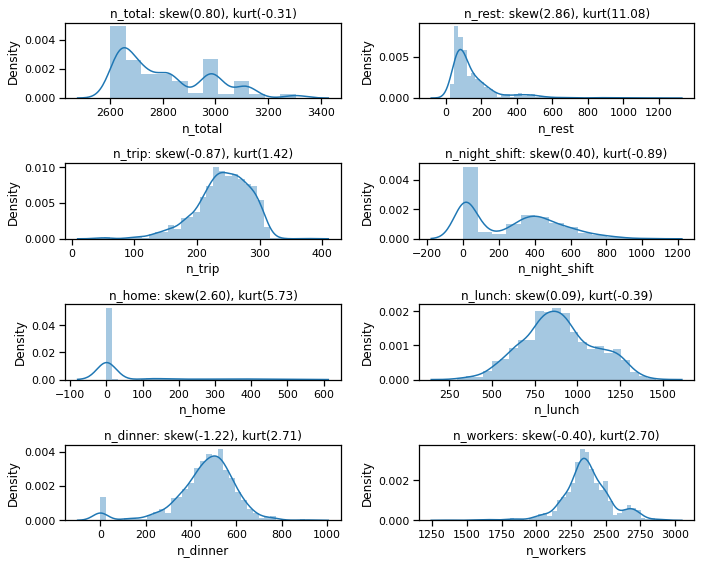

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(10, 8))
axes = [ y for x in axes for y in x ]

for i, ax in enumerate(axes):
    col = df_nums.columns[i + 2]
#     _ = ax.hist(df_nums[col])
    _ = sns.distplot(df_nums[col], ax=ax)
    _ = ax.set_title(f'{col}: skew({df_nums[col].skew():.2f}), kurt({df_nums[col].kurt():.2f})')
    
plt.tight_layout()
plt.show()

**📌 확인되는 정보**
- 왜도를 기준으로 데이터의 분포를 확인해보면
    - 대칭적(절대값이 0.5 이하) : n_night_shift, n_lunch, n_workers
    - 치우침(절대값이 0.5 초과) : n_total, n_rest, n_trip, n_home, n_dinner 👉 로그 변환 필요
- 첨도를 기준으로 데이터의 분포를 확인해보면
    - Platykurtic (첨도 3미만) : n_total, n_trip, n_night_shift, n_lunch, n_dinner, n_workers
    - Mesokurtic  (첨도 3~4)   : 
    - Platykurtic (첨도 4이상) : n_rest, n_home 👉 이상치 탐색 필요

**💬 아이디어**
- 재택근무자 수는 대체로 0이나 최대값이 500명대이다. 이는 코로나의 영향이 아닐까싶다 👉 날짜에 따른 분포 확인 필요

#### 이변수분석

1) 수치 데이터 간의 상관관계

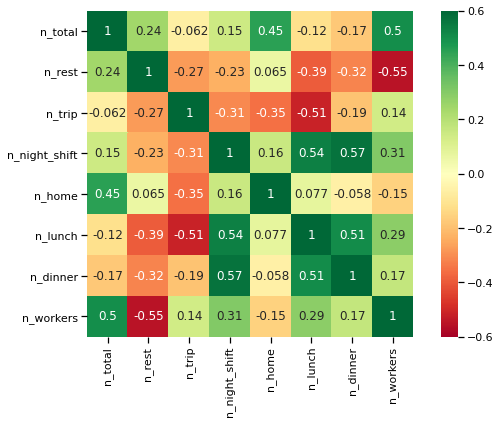

In [31]:
corrmat = df_nums.corr()
_ = sns.heatmap(corrmat, vmax=.6, vmin=-.6, square=True, annot=True, cmap='RdYlGn')
plt.show()

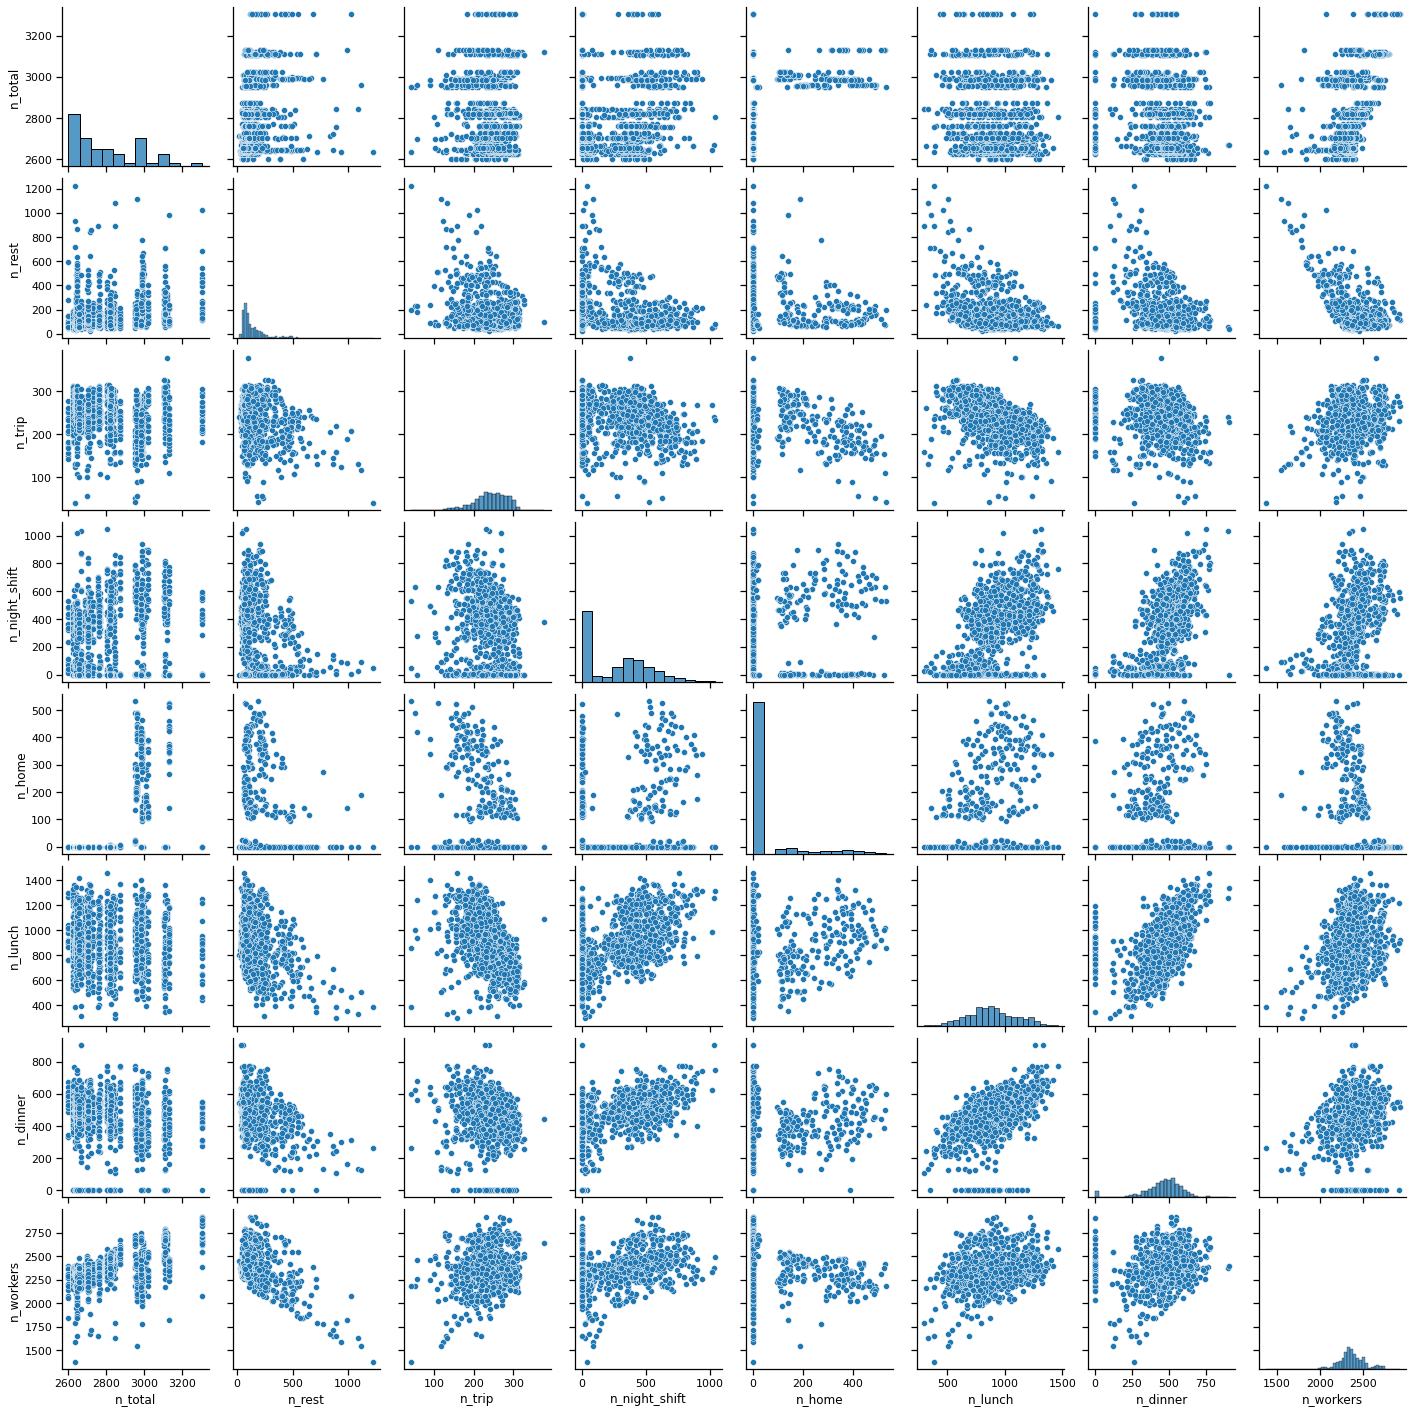

In [65]:
sns.pairplot(df_nums, size = 2.5)
plt.show()

2) 상관계수가 높은 것(절대값이 0.5이상)만 확인

In [62]:
high_relation = (corrmat >= 0.5) | (corrmat <= -0.5)
not_self = corrmat != 1
high_relation_corr = corrmat[high_relation & not_self].unstack().dropna().reset_index()
high_relation_corr

,level_0,level_1,0
0,n_total,n_workers,0.503771
1,n_rest,n_workers,-0.552661
2,n_trip,n_lunch,-0.512680
3,n_night_shift,n_lunch,0.535611
4,n_night_shift,n_dinner,0.571168
5,n_lunch,n_trip,-0.512680
6,n_lunch,n_night_shift,0.535611
7,n_lunch,n_dinner,0.508287
8,n_dinner,n_night_shift,0.571168
9,n_dinner,n_lunch,0.508287


- n_lunch

In [63]:
high_relation_corr[high_relation_corr['level_0'] == 'n_lunch']

,level_0,level_1,0
5,n_lunch,n_trip,-0.512680
6,n_lunch,n_night_shift,0.535611
7,n_lunch,n_dinner,0.508287


- n_dinner

In [64]:
high_relation_corr[high_relation_corr['level_0'] == 'n_dinner']

,level_0,level_1,0
8,n_dinner,n_night_shift,0.571168
9,n_dinner,n_lunch,0.508287


3) 상관계수가 조금 높은 것(절대값이 0.4 ~ 0.5)만 확인

In [70]:
under_0_5 = (-0.5 < corrmat) & (corrmat < 0.5)
over_0_4  = (corrmat >= 0.4) | (corrmat <= -0.4)
not_self = corrmat != 1

middle_relation_corr = corrmat[under_0_5 & over_0_4 & not_self].unstack().dropna().reset_index()
middle_relation_corr

,level_0,level_1,0
0,n_total,n_home,0.452293
1,n_home,n_total,0.452293


<AxesSubplot:xlabel='day'>

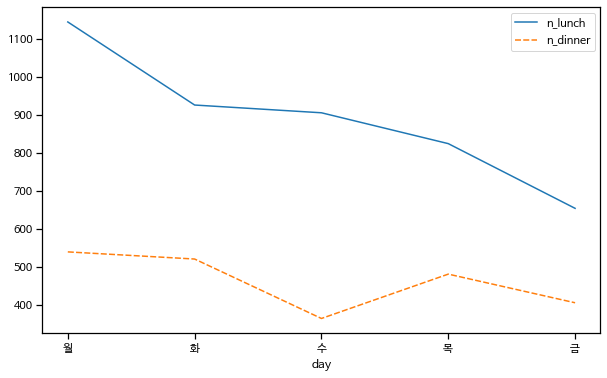

In [75]:
plt.rc('font', family='NanumBarunGothic')
sns.lineplot(data=df_nums.groupby('day')['n_lunch','n_dinner'].mean())
plt.show()

In [58]:
keys = {
    '월': 0,
    '화': 1,
    '수': 2, 
    '목': 3,
    '금': 4
}
sorted(['금', '화', '목', '화', '월', '금', '수'], key=lambda x: keys[x])

['월', '화', '화', '수', '목', '금', '금']